# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [17]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
%matplotlib inline


In [24]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
df = df.loc[:,['date','total_cases','location']]
df=df.loc[df['location'] == 'Ecuador']
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-22", FMT)).days)
##Eliminamos las filas en las que los casos tenian un total de cero, dejando unicamente donde empezaron los contagios
df= df[df['total_cases'] != 0]
len(df)
df

,date,total_cases,location
3603,39,1,Ecuador
3604,40,6,Ecuador
3605,41,7,Ecuador
3606,43,10,Ecuador
3607,44,13,Ecuador
3608,47,14,Ecuador
3609,48,15,Ecuador
3610,49,17,Ecuador
3611,52,23,Ecuador
3612,53,28,Ecuador


Imprimos los resultados y agregamos el numero del dia


In [25]:
len(df)

51

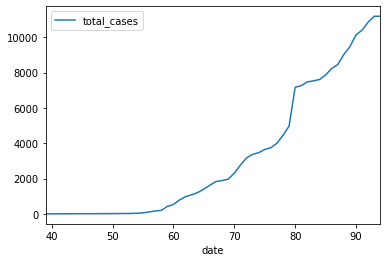

In [26]:
df.plot(x ='date', y='total_cases')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [28]:
filtro = df["location"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


nan
nan


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [11]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

11312


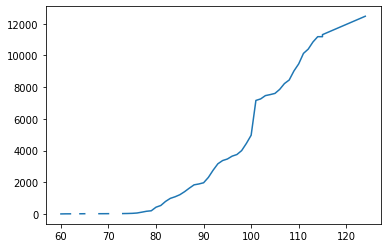

76
76


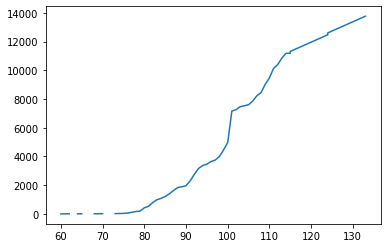

13763


In [12]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()
x_respaldo=np.zeros(len(x[61:]))
y_respaldo=np.zeros(len(y[61:]))
x_real= np.zeros(len(x[61:]))
y_real= np.zeros(len(y[61:]))
x_respaldo=x[61:]
y_respaldo=y[61:]
x_real=x[61:]
y_real=y[61:]
x
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
print(len(y[61:]))
print(len(x[61:]))
plt.plot(x[61:], y[61:])
plt.show()
print(y[-1])

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

**Comparar el modelo de predicion matematico vs probabilidad.**

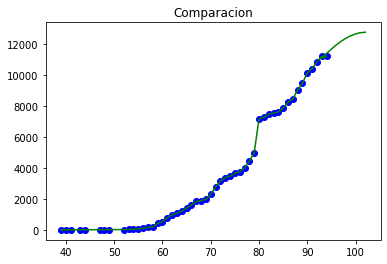

In [64]:
filtro = df.iloc [:, 1] 
media = filtro.mean()
mediana = filtro.median()
y = list(df.iloc [:, 1])
x = list(df.iloc [:, 0])
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
x1 = list(df.iloc [:, 0])
y1 = list(df.iloc [:, 1])
X = df.iloc[:, 0:1].values 
lin = LinearRegression() 
lin.fit(X, y1) 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(X, y1, color = 'blue') 
X1 = np.array(range(93,103))
for i in X1:
    x1.append(i)
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
for i in pre:
    y1.append(i)

plt.plot(x1, y1, color = 'g') 
plt.title('Comparacion') 
plt.show()    
        


**Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.**

*********
S0: 24999 
**********
I0: 1 
**********
R0: 0

 β: 0.30000000 
 γ= 0.20000000
 R0=1.50000000


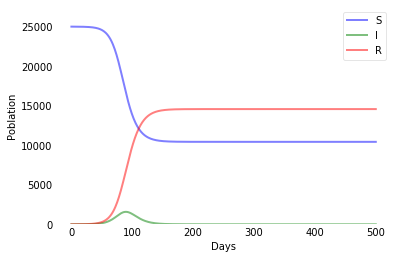

In [48]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import argparse
import sys
import json
import ssl
import urllib.request
class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0
    
    
    
          
    #def load_confirmed(self, country):
    #    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
     #   country_df = df[df['Country/Region'] == country]
      #  return country_df.iloc[0].loc[self.start_date:] 
    
    
     #def extend_index(self, index, new_size):
       # values = index.values
        #current = datetime.strptime(index[-1], '%m/%d/%y')
        #while len(values) < new_size:
          #  current = current + timedelta(days=1)
           # values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        #return values
    
    
    
    def train(self):
        data = y
        self.i0=data
        optimal = minimize(loss, 
                           [0.001, 0.001], 
                           args=(data, self.s_0, self.i_0, self.r_0)
                           , method='L-BFGS-B',
                           bounds=[(0.00000001, 0.3000), (0.00000001, 0.2000)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        R0final=beta/gamma
        print(f"\n β: {beta:.8f} \n γ= {gamma:.8f}\n R0={R0final:.8f}")
         #df = pd.DataFrame({'Infected': extended_actual,
                               #'Susceptible de infeccion': prediction.y[0], 
                              # 'Recovered': prediction.y[2]},
                              #index=new_index)
        

def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))
#Poblacion
N=25000
#i0=df[-1]
i0=1
r0=0
s0=N - i0 - r0
print('*********\nS0:',s0,'\n**********\nI0:',i0,'\n**********\nR0:',r0)
learner = Learner('Ecuador', loss, '15/1/2020', s0, i0, r0)
learner.train()

beta, gamma = learner.Beta, learner.Gamma
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 500, 500)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = s0, i0, r0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='I')
ax.plot(t, R, 'r', alpha=0.5, lw=2, label='R')
ax.set_xlabel('Days')
ax.set_ylabel('Poblation')
ax.set_ylim(0,N*1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.**

Ypro [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 7, 10, 13, 14, 15, 17, 23, 28, 37, 58, 111, 168, 199, 426, 532, 789, 981, 1082, 1211, 1403, 1627, 1835, 1890, 1966, 2302, 2758, 3163, 3368, 3465, 3646, 3747, 3995, 4450, 4965, 7161, 7257, 7466, 7529, 7603, 7858, 8225, 8450, 9022, 9468, 10128, 10398, 10850, 11183, 11183]


xpro [-22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


Y [1, 6, 7, 10, 13, 14, 15, 17, 23, 28, 37, 58, 111, 168, 199, 426, 532, 

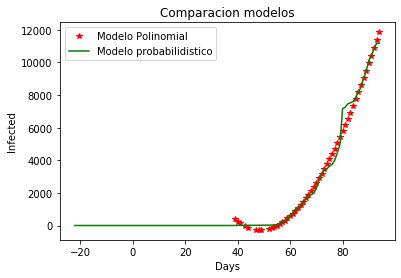

In [103]:
#Cargamos datos anteriores
#principio
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
df = df.loc[:,['date','total_cases','location']]
df=df.loc[df['location'] == 'Ecuador']
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-22", FMT)).days)
##Eliminamos las filas en las que los casos tenian un total de cer
separa = df.iloc [:, 1] 
#Obtenemos la mediana
media = separa.mean()
mediana = separa.median()
y = list(df.iloc [:, 1]) 
print("Ypro",y)
print("\n")
x = list(df.iloc [:, 0]) 
print("xpro",x)
print("\n")

ax.set_ylim(0,N*1.1)
df= df[df['total_cases'] != 0]
x1 = list(df.iloc [:, 0])
y1 = list(df.iloc [:, 1])
X = df.iloc[:, 0:1].values 
#lin = LinearRegresion() 
lin = LinearRegression() 
lin.fit(X, y1) 
poly = PolynomialFeatures(degree=3) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
print("Y",y1)
print("\n")
print("x",x1)
print("\n")
plt.plot(X, lin2.predict(poly.fit_transform(X)),"*", label = "Modelo Polinomial" ,color = 'r') 
plt.title('Comparacion modelos')                   
plt.xlabel("Days")
plt.ylabel("Infected")
plt.plot(x,y, label="Modelo probabilidistico" ,color='g')
plt.legend()
plt.show()

## Analisis
 EL modelo polinomial consigue añadir curvatura al modelo introduciendo nuevos predictores, es necesario predecir el valor de la variable respuesta en puntos interpolados dentro del rango del predictor, el modelo basado en probabilidad  esta mas cerca de la realidad ya que el crecimiento por el valor de la mediana es mas certero, son optimos hasta cierto punto.

## Conclusiones
Ambos modelos se acercan a la realidad pero sin duda el modelo polinomial se acerca mas a la realidad no tiene mucha diferencia con los resultados y puede hacer una mejor prediccion, sin embargo el modelo de probabilidad tiene sus ventajas y es que muestra datos reales pero conforme pasan los dias los datos van siendo falibles.



## Criterio personal (politico, economico y  social de la situacion)

Ecuador es el segundo país con mayor número de contagios por COVID-19 en Latinoamérica con un total de 22.179 personas afectadas.

Las cifras parecen haberse duplicado a comparación de los registros oficiales publicados en días anteriores; sin embargo, Juan Carlos Zevallos, ministro de salud pública, declaró que "No hay un nuevo brote entre la población, simplemente se han realizado las pruebas que estaban retenidas". No obstante, Zevallos no dio detalles del número de personas fallecidas.

A pesar de que la prensa internacional cataloga a Ecuador como el país sudamericano que sufre uno de los peores brotes en el mundo; la Ministra de Gobierno propone a la población pasar del aislamiento social al distanciamiento. En mi opinión esta disposición política resultará en graves repercusiones en la sociedad y en la salud de la misma; y la responsable de las consecuencias fatales que se avecinan será María Paula Romo. 
Una vez más, al Estado parece importarle más la economía del país que la vida de los ciudadanos. Sin la intención de caer en el pesimismo, me arriesgo a sugerir que el distanciamiento no dará resultados positivos y en 20 días nos veremos obligados a regresar a las medidas de aislamiento ya que el ecuatoriano promedio no es precavido en su salud, ni se dispone a cumplir a cabalidad con las normas de prevención.

Hasta la fecha las cifras de fallecimiento son lamentables y pese a que el primer mandatario, Lenín Moreno se esfuerza por dar esperanza a su pueblo, el futuro de la nación parece incierto y poco alentador. Los ecuatorianos demostramos que no estábamos preparados para el aislamiento, y menos aún para el distanciamiento. Nos encontramos ante un año difícil para el Ecuador, que sin duda tardará en reponerse en su totalidad.


# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/